### Question 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(82)

In [3]:
# Given parameters
sigma_r = 0.3 # measurement noise standard deviation
sigma_x = 0.25
sigma_y = 0.25

In [4]:
r = np.sqrt(np.random.uniform(0, 1))
theta = np.random.uniform(0, 2*np.pi)

x_true, y_true = r*np.cos(theta), r*np.sin(theta) # true position

In [5]:
grid_lim = 2.0 # grid limits of -2 to 2
n_grid = 201 # number of grid points

xg = np.linspace(-grid_lim, grid_lim, n_grid)
yg = np.linspace(-grid_lim, grid_lim, n_grid)
x_mesh, y_mesh = np.meshgrid(xg, yg)

In [6]:
# MAP objective
def map_objective(xx, yy, landmarks, ranges, sigma_r, sigma_x, sigma_y):
    """ Using derived formula for MAP objective"""
    j_MAP = (xx**2)/(sigma_x**2) + (yy**2)/(sigma_y**2)
    for (xi, yi), ri in zip(landmarks, ranges):
        di = np.sqrt((xx - xi)**2 + (yy - yi)**2)
        j_MAP += (ri - di)**2 / (sigma_r**2)
    return j_MAP

# generate landmarks on unit circle
def evenly_spaced_landmarks_on_unit_circle(K):
    angles = np.linspace(0, 2*np.pi, K, endpoint=False)
    return np.c_[np.cos(angles), np.sin(angles)]

# simulate ranges from landmarks 
def simulate_ranges(true_xy, landmarks, sigma_r):
    ranges = []
    for (xi, yi) in landmarks:
        d_true = np.sqrt((true_xy[0]-xi)**2 + (true_xy[1]-yi)**2)
        ri = d_true + np.random.normal(0, sigma_r)
        while ri < 0:
            ri = d_true + np.random.normal(0, sigma_r)
        ranges.append(ri)
    return np.array(ranges)

In [7]:
K_vals = [1, 2, 3, 4] # number of landmarks
objectives = {}
all_values = []

true_xy = np.array([x_true, y_true])

for K in K_vals:
    # get landmarks and ranges
    landmark = evenly_spaced_landmarks_on_unit_circle(K)
    r_measurement = simulate_ranges(true_xy, landmark, sigma_r)

    j_MAP = map_objective(x_mesh, y_mesh, landmark, r_measurement, sigma_r, sigma_x, sigma_y)
    objectives[K] = dict(J=j_MAP, landmark=landmark, r_measurement=r_measurement)
    all_values.append(j_MAP.ravel())

    # find MAP
    j_MAP = objectives[K]["J"]
    idx = np.argmin(j_MAP)
    iy, ix = np.unravel_index(idx, j_MAP.shape)
    x_map, y_map = xg[ix], yg[iy]
    print(f"K = {K}: MAP = ({x_map:.4f}, {y_map:.4f}) | True = ({x_true:.4f}, {y_true:.4f})")
    print(f"MAP error (MSE): {mean_squared_error([x_true, y_true], [x_map, y_map]):.4f}\n")

K = 1: MAP = (-0.3200, 0.0000) | True = (-0.3364, -0.4026)
MAP error (MSE): 0.0812

K = 2: MAP = (-0.1800, 0.0000) | True = (-0.3364, -0.4026)
MAP error (MSE): 0.0933

K = 3: MAP = (-0.2000, -0.2400) | True = (-0.3364, -0.4026)
MAP error (MSE): 0.0225

K = 4: MAP = (-0.2400, -0.5000) | True = (-0.3364, -0.4026)
MAP error (MSE): 0.0094



In [8]:
# set contour levels
all_values = np.concatenate(all_values)
Jmin_global = all_values.min()
J95 = np.quantile(all_values, 0.95)
levels = np.linspace(Jmin_global, J95, 14)

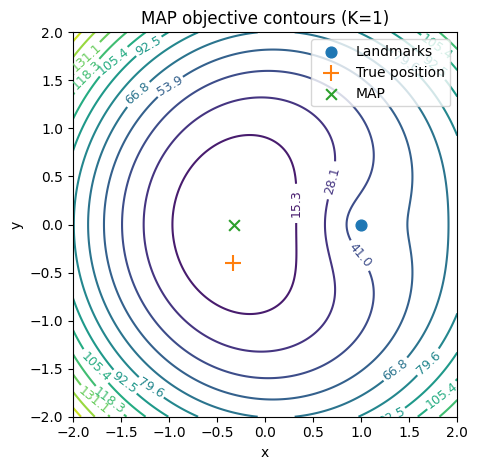

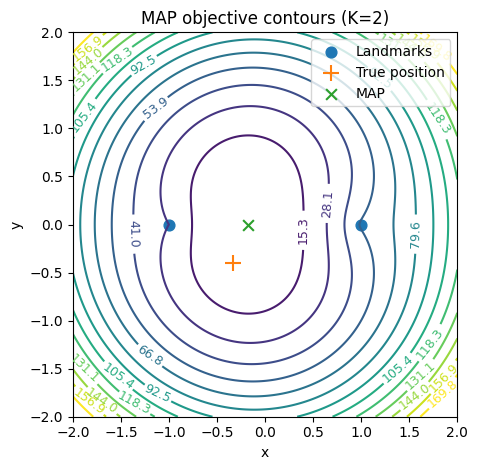

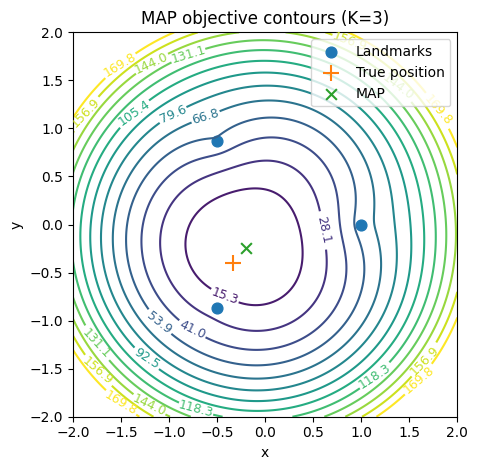

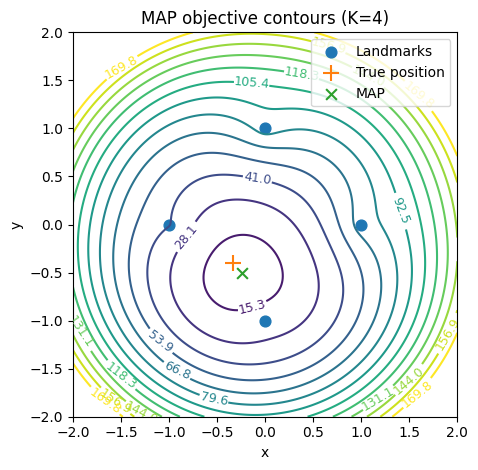

In [10]:
for K in K_vals:
    j_MAP = objectives[K]["J"]
    landmark = objectives[K]["landmark"]

    idx = np.argmin(j_MAP)
    iy, ix = np.unravel_index(idx, j_MAP.shape)
    x_map, y_map = xg[ix], yg[iy]

    plt.figure()
    CS = plt.contour(x_mesh, y_mesh, j_MAP, levels=levels) # contour plot
    plt.clabel(CS, inline=1, fontsize=9)

    # plot true position, landmarks, and MAP
    plt.scatter(landmark[:,0], landmark[:,1], marker='o', s=60, label='Landmarks')
    plt.scatter([x_true], [y_true], marker='+', s=120, label='True position')
    plt.scatter([x_map], [y_map], marker='x', s=60, label='MAP')

    plt.gca().set_aspect('equal', 'box') # set aspect ratio
    plt.xlim(-grid_lim, grid_lim); plt.ylim(-grid_lim, grid_lim) # set axis limits
    
    plt.title(f"MAP objective contours (K={K})")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
